# Non-convex MINLP with Couenne

Source: https://helve-blog.com/posts/python/pyomo-couenne-nonconvex-minlp/

Formulation:

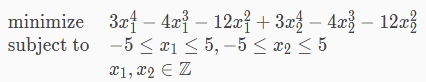

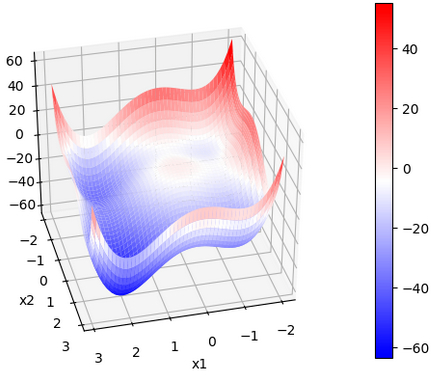

(x1, x2) = (2, 2) is the global optimum of −64, but there are local solutions at (-1, -1), (-1, 2), and (2, -1).

In [1]:
import pyomo.environ as pyo

def ObjRule(m):
    return 3*m.x1**4-4*m.x1**3-12*m.x1**2 + 3*m.x2**4-4*m.x2**3-12*m.x2**2

model = pyo.ConcreteModel(name="Nonconvex MINLP sample")

model.x1 = pyo.Var(domain=pyo.Integers, bounds=(-5, 5), initialize=-1)
model.x2 = pyo.Var(domain=pyo.Integers, bounds=(-5, 5), initialize=-1)

model.OBJ = pyo.Objective(rule = ObjRule, sense = pyo.minimize)

opt = pyo.SolverFactory('couenne')
res = opt.solve(model, tee=False)

print(f"\nObjective：{model.OBJ()}")
print(f"x1: {model.x1()}")
print(f"x2: {model.x2()}")


Objective：-64.0
x1: 2.0
x2: 2.0
